In [10]:
# 🧠 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
)




In [11]:
#📂 Step 2: Load Dataset
df = pd.read_csv('../data/anemia_data.csv')  # Ensure correct path
print("✅ Dataset loaded successfully.")
df.head()

✅ Dataset loaded successfully.


,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB
None

🧼 Missing Values:
Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64


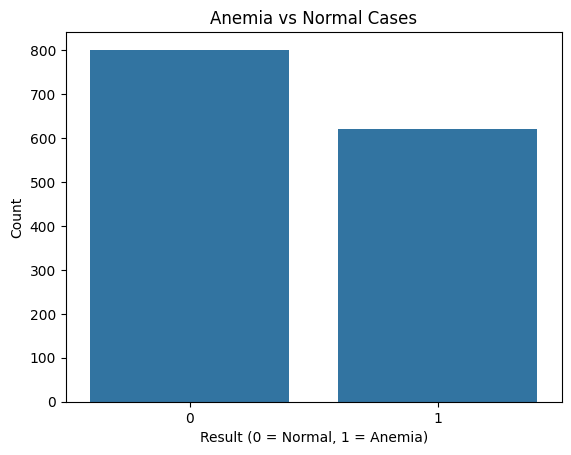

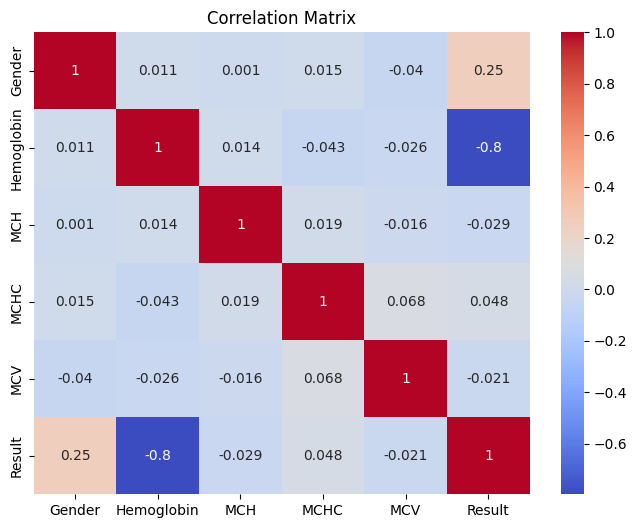

In [12]:
# 📊 Step 3: Exploratory Data Analysis

# General overview
print("🔍 Dataset Info:")
print(df.info())

# Check missing values
print("\n🧼 Missing Values:")
print(df.isnull().sum())

# Countplot of the target variable
sns.countplot(x='Result', data=df)
plt.title("Anemia vs Normal Cases")
plt.xlabel("Result (0 = Normal, 1 = Anemia)")
plt.ylabel("Count")
plt.show()


# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [13]:
# 🧹 Step 4: Preprocessing

# Encode 'Gender' if present
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Define features & target based on your column names
features = ['Hemoglobin', 'MCH', 'MCHC', 'MCV']
X = df[features]
y = df['Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Preprocessing complete. Data ready for model.")


✅ Preprocessing complete. Data ready for model.


In [14]:
# 🤖 Step 5: Train the Model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained successfully.")


✅ Model trained successfully.


🎯 Accuracy: 0.9930

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       157
           1       1.00      0.98      0.99       128

    accuracy                           0.99       285
   macro avg       0.99      0.99      0.99       285
weighted avg       0.99      0.99      0.99       285



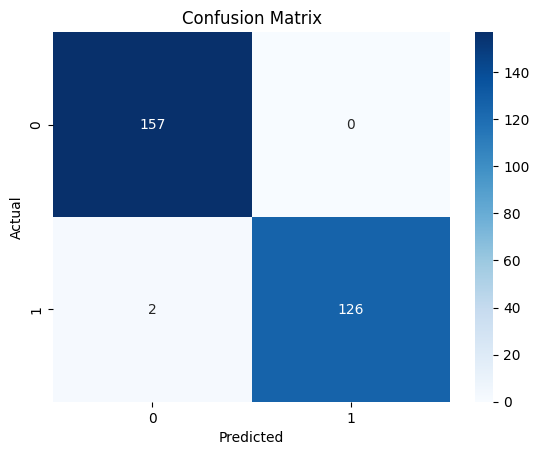

In [15]:
# 📈 Step 6: Evaluate the Model

y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {accuracy:.4f}")

# Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
# 💾 Step 7: Save the Model and Features

# Save model
with open('../model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save feature column names (optional, helpful in Flask)
with open('../feature_columns.pkl', 'wb') as f:
    pickle.dump(features, f)

print("✅ model.pkl and feature_columns.pkl saved successfully.")


✅ model.pkl and feature_columns.pkl saved successfully.
